In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv('tested.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(331, 3)

In [6]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [27]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
X_train.head(2)

,Age,Fare
281,0.75,13.775
96,76.00,78.850


In [31]:
clf=DecisionTreeClassifier()

In [32]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred)

0.582089552238806

In [34]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.5741532976827093

In [35]:
kbin_age=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [36]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [37]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

In [38]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.33      , 13.53333333, 18.        , 20.        , 22.        ,
              24.        , 25.2       , 27.73333333, 30.        , 32.        ,
              36.        , 39.        , 43.8       , 47.93333333, 55.        ,
              76.        ])                                                   ],
      dtype=object)

In [40]:
output=pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [41]:
output['age_labels']=pd.cut(x=X_train['Age'],
                           bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_lebels']=pd.cut(x=X_train['Fare'],
                            bins=trf.named_transformers_['second'].bin_edges_[0]).tolist()

In [42]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_lebels
181,37.0,10.0,83.1583,13.0,"(36.0, 39.0]","(78.679, 141.325]"
362,31.0,8.0,21.0000,8.0,"(30.0, 32.0]","(14.891, 21.0]"
43,30.0,8.0,13.0000,6.0,"(27.733, 30.0]","(12.253, 13.0]"
316,57.0,14.0,146.5208,14.0,"(55.0, 76.0]","(141.325, 512.329]"
165,26.0,6.0,22.0250,8.0,"(25.2, 27.733]","(21.0, 26.0]"


In [43]:
clf=DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2=clf.predict(X_test_trf)

In [44]:
accuracy_score(y_test,y_pred2)

0.5970149253731343

In [45]:
X_trf=trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.5710338680926915

In [49]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMean

0.556060606060606


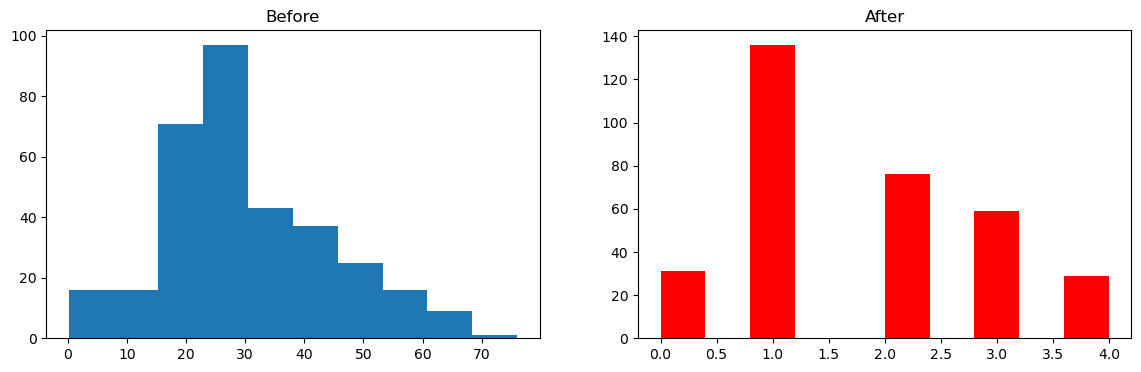

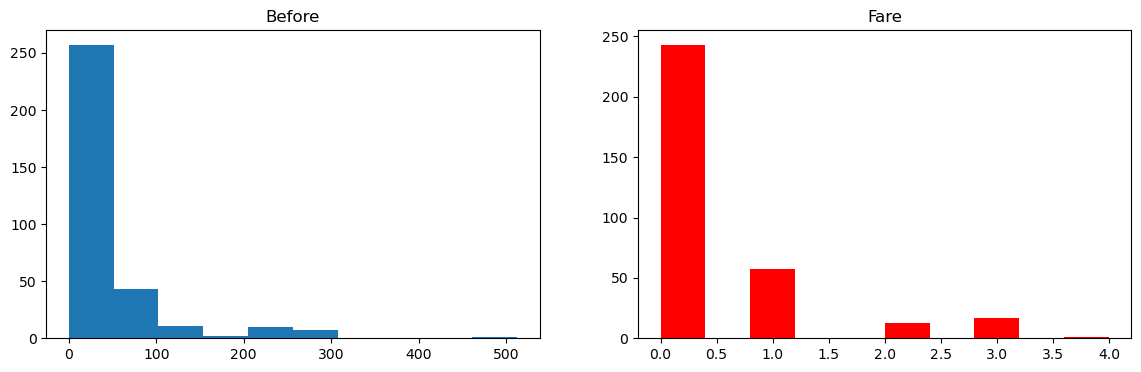

In [51]:
discretize(5,'kmeans')